In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df = pd.read_csv('NASDAQ.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AdjClose', 'Open', 'High', 'Low', 'Close',
       'Volume', 'avg7', 'avg10', 'avg50', 'avg100', 'avg200', 'avg253',
       'SPD_OPEN/CLOSE', 'SPD_HIGH/LOW', 'Adj_Close_Returns', 'Close_Returns',
       'Log_Returns', 'pos_string', 'count_pos_string', 'macd', 'signal',
       'hist', 'MACD_1DAY_strategy', 'MACD_9DAY_strategy',
       'MACD_CONVERGENCE_strategy', 'RSI', 'RSI_strategy', 'OBV', 'OBV_EMA',
       'OBV_strategy', 'TSF', 'TSF_strategy', 'WILLR', 'WILLR_strategy',
       'STOCH_K', 'STOCH_D', 'STOCH_K_strategy', 'STOCH_D_strategy', 'EMA',
       'TEMA', 'upperband', 'middleband', 'lowerband', 'MOM', 'stok', 'stod',
       'CCI', 'direction'],
      dtype='object')

In [4]:
#df = df[['AdjClose','avg10','macd','RSI','WILLR','Open','High','Low','avg7','SPD_OPEN/CLOSE','SPD_HIGH/LOW','macd','OBV','TSF','stok','stod','EMA','TEMA','upperband','middleband','lowerband', 'MOM','ROC','CCI','Turning_line', 'Standard_line', 'ichimoku_span1', 'ichimoku_span2']]
df = df[['Date','Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]

In [5]:
"""def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0"""

'def classify(current, future):\n    if float(future) > float(current):\n        return 1\n    else:\n        return 0'

In [6]:
"""df['future'] = df['AdjClose'].shift(-1)
df['target'] = list(map(classify, df['AdjClose'], df['future']))
df.dropna(inplace=True)"""

"df['future'] = df['AdjClose'].shift(-1)\ndf['target'] = list(map(classify, df['AdjClose'], df['future']))\ndf.dropna(inplace=True)"

In [7]:
df

,Date,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,2000-02-22 00:00:00,-0.006737,4382.120117,4428.157031,117.136692,55.366077,75.960730,84.605404,-41.561431,-1
1,2000-02-23 00:00:00,0.037667,4550.330078,4440.440039,122.872909,61.685807,74.542848,78.849153,-4.942459,1
2,2000-02-24 00:00:00,0.014686,4617.649902,4465.881006,131.337078,63.889460,84.254756,78.252778,-0.731844,1
3,2000-02-25 00:00:00,-0.005897,4590.500000,4476.368018,134.306026,62.332393,91.027774,83.275126,-21.242376,-1
4,2000-02-28 00:00:00,-0.002759,4577.850098,4494.608008,134.092463,61.579355,80.578863,85.287131,-36.289190,-1
...,...,...,...,...,...,...,...,...,...,...
5526,2022-02-07 00:00:00,-0.005858,14015.669920,13920.069040,-302.469041,42.611042,24.006707,27.849254,-72.030739,-1
5527,2022-02-08 00:00:00,0.012675,14194.450200,13985.585060,-273.125152,46.053614,36.985694,30.072336,-51.086611,1
5528,2022-02-09 00:00:00,0.020633,14490.370120,14080.410060,-223.416241,51.264802,58.309014,39.767138,-1.955609,1
5529,2022-02-10 00:00:00,-0.021254,14185.639650,14163.696000,-206.233443,46.304337,67.799877,54.364862,-43.558149,-1


In [8]:
df['direction'].value_counts()

 1    3008
-1    2523
Name: direction, dtype: int64

In [9]:
"""df = df.drop('future',axis=1)"""

"df = df.drop('future',axis=1)"

In [10]:
"""df_norm = df
def normalizeandscale(df_norm):
    for col in df_norm.columns:
        if col != 'target':
            df_norm[col] = preprocessing.scale(df_norm[col].values)
            df_norm[col] = df_norm[col]/df_norm[col].abs().max()
    return df_norm"""

"df_norm = df\ndef normalizeandscale(df_norm):\n    for col in df_norm.columns:\n        if col != 'target':\n            df_norm[col] = preprocessing.scale(df_norm[col].values)\n            df_norm[col] = df_norm[col]/df_norm[col].abs().max()\n    return df_norm"

In [11]:
#normalizeandscale(df_norm)

In [12]:
df_norm = df[['Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]
for col in df_norm.columns:
        if col != 'direction':
            df_norm[col]=(df_norm[col].values-np.min(df_norm[col]))/(np.max(df_norm[col])-np.min(df_norm[col]))
            df_norm.dropna(inplace=True)
            preprocessing.scale(df_norm[col].values)

df_norm

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.472489,0.218694,0.221915,0.773995,0.589084,0.860011,0.906058,0.843740,-1
1,0.640661,0.229950,0.222749,0.780154,0.682314,0.851740,0.869522,0.981418,1
2,0.553624,0.234455,0.224477,0.789242,0.714822,0.908391,0.865736,0.997248,1
3,0.475669,0.232638,0.225189,0.792429,0.691852,0.947899,0.897615,0.920134,-1
4,0.487551,0.231792,0.226428,0.792200,0.680743,0.886949,0.910385,0.863562,-1
...,...,...,...,...,...,...,...,...,...
5526,0.475818,0.863366,0.866512,0.323466,0.400919,0.556956,0.545812,0.729183,-1
5527,0.546007,0.875330,0.870961,0.354972,0.451704,0.632664,0.559922,0.807927,1
5528,0.576147,0.895132,0.877401,0.408344,0.528581,0.757046,0.621458,0.992647,1
5529,0.417506,0.874740,0.883057,0.426794,0.455403,0.812407,0.714113,0.836232,-1


In [13]:
df_norm.describe()

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
count,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000
mean,0.498783,0.215022,0.214528,0.662319,0.567197,0.680411,0.655793,0.793818,0.087688
std,0.059743,0.219910,0.222274,0.081316,0.172587,0.242213,0.254593,0.170179,0.996238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.474402,0.068184,0.065728,0.631741,0.441766,0.456607,0.421726,0.645908,-1.000000
50%,0.501487,0.113618,0.111501,0.665060,0.579378,0.729097,0.704875,0.829440,1.000000
75%,0.526462,0.273202,0.272362,0.691358,0.699603,0.909811,0.897768,0.952387,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_norm.drop('AdjClose',axis = 1, inplace=True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df_norm

,Log_Returns,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.472489,0.221915,0.773995,0.589084,0.860011,0.906058,0.843740,-1
1,0.640661,0.222749,0.780154,0.682314,0.851740,0.869522,0.981418,1
2,0.553624,0.224477,0.789242,0.714822,0.908391,0.865736,0.997248,1
3,0.475669,0.225189,0.792429,0.691852,0.947899,0.897615,0.920134,-1
4,0.487551,0.226428,0.792200,0.680743,0.886949,0.910385,0.863562,-1
...,...,...,...,...,...,...,...,...
5526,0.475818,0.866512,0.323466,0.400919,0.556956,0.545812,0.729183,-1
5527,0.546007,0.870961,0.354972,0.451704,0.632664,0.559922,0.807927,1
5528,0.576147,0.877401,0.408344,0.528581,0.757046,0.621458,0.992647,1
5529,0.417506,0.883057,0.426794,0.455403,0.812407,0.714113,0.836232,-1


In [16]:
times= sorted(df_norm.index.values)
"""last20_pct=sorted(df_norm.index.values)[-int(0.2*len(times))]
validation_df_norm=df_norm[(df_norm.index>=last20_pct)]
df_norm=df_norm[(df_norm.index<last20_pct)]"""
last30_pct=sorted(df_norm.index.values)[-int(0.3*len(times))]
test=df_norm[(df_norm.index>=last30_pct)]
train=df_norm[(df_norm.index<last30_pct)]

In [17]:
train.drop('Log_Returns', axis = 1, inplace = True)
test.drop('Log_Returns', axis = 1, inplace = True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
train

,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.221915,0.773995,0.589084,0.860011,0.906058,0.843740,-1
1,0.222749,0.780154,0.682314,0.851740,0.869522,0.981418,1
2,0.224477,0.789242,0.714822,0.908391,0.865736,0.997248,1
3,0.225189,0.792429,0.691852,0.947899,0.897615,0.920134,-1
4,0.226428,0.792200,0.680743,0.886949,0.910385,0.863562,-1
...,...,...,...,...,...,...,...
3867,0.261985,0.623227,0.282950,0.336040,0.324878,0.518760,-1
3868,0.260626,0.617164,0.311239,0.314976,0.293344,0.542653,1
3869,0.259849,0.619217,0.459506,0.351926,0.279156,0.684984,1
3870,0.259788,0.627478,0.572368,0.510039,0.342268,0.824497,1


## HPELM

In [19]:
X_train = np.array(train.iloc[:,:-1])
y_train = np.array(train.iloc[:,-1])

X_test = np.array(test.iloc[:,:-1])
y_test = np.array(test.iloc[:,-1])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import random

In [21]:
random.seed(1234)

In [22]:
"""from hpelm import HPELM
import matplotlib.pyplot as plt
loss_train=[]
loss_test=[]
acc_train=[]
acc_test=[]

ranger = range(5,400,5)

for i in ranger:
    elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
    elm.add_neurons(i, "sigm") #tanh lavora peggio
    #elm.add_neurons(1, 'sigm')
    elm.train(X_train,y_train)
    y_predicted = elm.predict(X_train)
    y_predicted_test = elm.predict(X_test)
    y_pred = []
    for j in y_predicted:
        if j > np.mean(y_predicted):
            y_pred.append(1)
        else:
            y_pred.append(-1)

    y_pred_test = []
    for j in y_predicted_test:
        if j > np.mean(y_predicted_test):
            y_pred_test.append(1)
        else:
            y_pred_test.append(-1)
    print(f'\n model with {i} neurons')
    print('accuracy train: ', accuracy_score(y_train, y_pred))
    print('accuracy test: ', accuracy_score(y_test, y_pred_test))
    print('loss train: ', log_loss(y_train, y_pred))
    print('loss test: ', log_loss(y_test, y_pred_test))

    loss_train.append(log_loss(y_train, y_pred))
    loss_test.append(log_loss(y_test, y_pred_test))

    acc_train.append(accuracy_score(y_train, y_pred))
    acc_test.append(accuracy_score(y_test, y_pred_test))"""

'from hpelm import HPELM\nimport matplotlib.pyplot as plt\nloss_train=[]\nloss_test=[]\nacc_train=[]\nacc_test=[]\n\nranger = range(5,400,5)\n\nfor i in ranger:\n    elm = HPELM(X_train.shape[1], 1,\'c\', batch = 24)\n    elm.add_neurons(i, "sigm") #tanh lavora peggio\n    #elm.add_neurons(1, \'sigm\')\n    elm.train(X_train,y_train)\n    y_predicted = elm.predict(X_train)\n    y_predicted_test = elm.predict(X_test)\n    y_pred = []\n    for j in y_predicted:\n        if j > np.mean(y_predicted):\n            y_pred.append(1)\n        else:\n            y_pred.append(-1)\n\n    y_pred_test = []\n    for j in y_predicted_test:\n        if j > np.mean(y_predicted_test):\n            y_pred_test.append(1)\n        else:\n            y_pred_test.append(-1)\n    print(f\'\n model with {i} neurons\')\n    print(\'accuracy train: \', accuracy_score(y_train, y_pred))\n    print(\'accuracy test: \', accuracy_score(y_test, y_pred_test))\n    print(\'loss train: \', log_loss(y_train, y_pred))\n  

In [23]:
"""plt.title('loss')
plt.plot(ranger,loss_train, label='train')
plt.plot(ranger,loss_test, label = 'test')"""

"plt.title('loss')\nplt.plot(ranger,loss_train, label='train')\nplt.plot(ranger,loss_test, label = 'test')"

In [24]:
"""plt.title('accuracy')
plt.plot(ranger,acc_train, label = 'train')
plt.plot(ranger,acc_test, label = 'test')"""

"plt.title('accuracy')\nplt.plot(ranger,acc_train, label = 'train')\nplt.plot(ranger,acc_test, label = 'test')"

In [25]:
from hpelm import HPELM

elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
elm.add_neurons(21, "sigm") #tanh lavora peggio
#elm.add_neurons(1, 'sigm')
elm.train(X_train,y_train)

In [26]:
y_predicted = elm.predict(X_train)
y_predicted_test = elm.predict(X_test)

In [27]:
#If OTS > Mean (OTS), predicted trend is up (1) else down (0).
y_pred = []
for i in y_predicted:
    if i > np.mean(y_predicted):
        y_pred.append(1)
    elif i == np.mean(y_predicted):
        y_pred.append(0)
    else:
        y_pred.append(-1)

y_pred_test = []
for i in y_predicted_test:
    if i > np.mean(y_predicted_test):
        y_pred_test.append(1)
    elif i == np.mean(y_predicted):
        y_pred_test.append(0)
    else:
        y_pred_test.append(-1)

In [28]:
print('accuracy train: ', accuracy_score(y_train, y_pred))
print('accuracy test: ', accuracy_score(y_test, y_pred_test))

accuracy train:  0.8455578512396694
accuracy test:  0.6238698010849909


In [29]:
print('loss train: ', log_loss(y_train, y_pred))
print('loss test: ', log_loss(y_test, y_pred_test))

loss train:  5.334303761724819
loss test:  12.991159735492621


## Train

In [30]:
train_eval = pd.DataFrame(df['Log_Returns'])
train_eval.set_index(df.index)

,Log_Returns
0,-0.006737
1,0.037667
2,0.014686
3,-0.005897
4,-0.002759
...,...
5526,-0.005858
5527,0.012675
5528,0.020633
5529,-0.021254


In [31]:
train_eval = train_eval.loc[:3871]

In [32]:
train_eval

,Log_Returns
0,-0.006737
1,0.037667
2,0.014686
3,-0.005897
4,-0.002759
...,...
3867,-0.017705
3868,0.002571
3869,0.015182
3870,0.014661


In [33]:
train_eval['strat_hpelm'] = y_pred

In [34]:
train_eval['hpelm_Returns'] = train_eval['strat_hpelm']*train_eval['Log_Returns']

In [35]:
train_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns      1.157115e+00
hpelm_Returns    1.109282e+17
dtype: float64

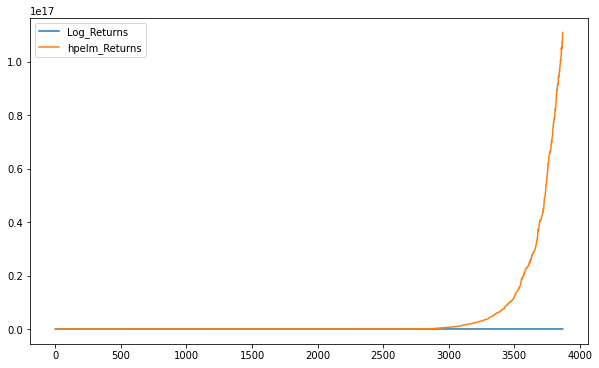

In [36]:
train_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Test

In [37]:
test_eval = pd.DataFrame(df['Log_Returns'])
test_eval.set_index(df.index)

,Log_Returns
0,-0.006737
1,0.037667
2,0.014686
3,-0.005897
4,-0.002759
...,...
5526,-0.005858
5527,0.012675
5528,0.020633
5529,-0.021254


In [38]:
test_eval = test_eval.loc[3872:]

In [39]:
test_eval

,Log_Returns
3872,-0.001166
3873,0.012520
3874,0.009054
3875,0.001672
3876,-0.002060
...,...
5526,-0.005858
5527,0.012675
5528,0.020633
5529,-0.021254


In [40]:
test_eval['strat_hpelm'] = y_pred_test

In [41]:
test_eval['hpelm_Returns'] = test_eval['strat_hpelm']*test_eval['Log_Returns']

In [42]:
test_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns        2.701557
hpelm_Returns    428.239616
dtype: float64

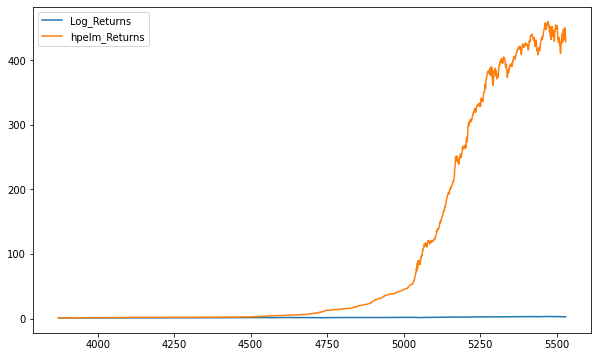

In [43]:
test_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [44]:
output = df[['Date','Log_Returns','AdjClose']]

In [45]:
output

,Date,Log_Returns,AdjClose
0,2000-02-22 00:00:00,-0.006737,4382.120117
1,2000-02-23 00:00:00,0.037667,4550.330078
2,2000-02-24 00:00:00,0.014686,4617.649902
3,2000-02-25 00:00:00,-0.005897,4590.500000
4,2000-02-28 00:00:00,-0.002759,4577.850098
...,...,...,...
5526,2022-02-07 00:00:00,-0.005858,14015.669920
5527,2022-02-08 00:00:00,0.012675,14194.450200
5528,2022-02-09 00:00:00,0.020633,14490.370120
5529,2022-02-10 00:00:00,-0.021254,14185.639650


In [46]:
output_test = pd.merge(output, test_eval, left_index = True, right_index=True)
output_test.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_test.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_test.set_index('Date', inplace=True)


In [47]:
output_train = pd.merge(output, train_eval, left_index = True, right_index=True)
output_train.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_train.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_train.set_index('Date', inplace=True)

In [48]:
output_train

,Log_Returns,strat_hpelm
Date,,
2000-02-22 00:00:00,-0.006737,-1
2000-02-23 00:00:00,0.037667,1
2000-02-24 00:00:00,0.014686,1
2000-02-25 00:00:00,-0.005897,-1
2000-02-28 00:00:00,-0.002759,-1
...,...,...
2015-07-08 00:00:00,-0.017705,-1
2015-07-09 00:00:00,0.002571,-1
2015-07-10 00:00:00,0.015182,1


In [49]:
output_test

,Log_Returns,strat_hpelm
Date,,
2015-07-15 00:00:00,-0.001166,-1
2015-07-16 00:00:00,0.012520,-1
2015-07-17 00:00:00,0.009054,-1
2015-07-20 00:00:00,0.001672,-1
2015-07-21 00:00:00,-0.002060,-1
...,...,...
2022-02-07 00:00:00,-0.005858,1
2022-02-08 00:00:00,0.012675,1
2022-02-09 00:00:00,0.020633,1


In [50]:
output_train.to_csv('NASDAQ_strategy_hpelm_train.csv')

In [51]:
output_test.to_csv('NASDAQ_strategy_hpelm_test.csv')